In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier


# Görselleştirme ayarları
%matplotlib inline
sns.set(style="whitegrid")

print("Tüm kütüphaneler yüklendi.")

Tüm kütüphaneler yüklendi.


In [2]:
#DOSYA YOLLARI YÜKLEME KISMI
path_flights = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/flights.csv'
path_airports = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/airports.csv'
path_airlines = r'/Users/oguzhanozdemir/Desktop/veri/dataSet/airlines.csv'


In [3]:
def load_data(path_flights, path_airports, path_airlines):
   
    try:
        df_flights = pd.read_csv(path_flights, low_memory=False)
        print(f"Flights tablosu yüklendi. Boyut: {df_flights.shape}")
        
        df_airports = pd.read_csv(path_airports)
        print(f"Airports tablosu yüklendi. Boyut: {df_airports.shape}")
        
        df_airlines = pd.read_csv(path_airlines)
        print(f"Airlines tablosu yüklendi. Boyut: {df_airlines.shape}")
        
        return df_flights, df_airports, df_airlines
    
    except FileNotFoundError as e:
        print(f"Dosya bulunamadı. ({e})")
        return None, None, None
    except Exception as e:
        print(f"Hata oluştu. ({e})")
        return None, None, None

print("load_data fonksiyonu tanımlandı.")


load_data fonksiyonu tanımlandı.


In [4]:
try: 
    df_flights = pd.read_csv(path_flights, low_memory=False)
    print(f"Flights tablosunun boyutu : {df_flights.shape}")
    df_airports = pd.read_csv(path_airports)
    print(f"Airports tablosunun boyutu : {df_airports.shape}")
    df_airlines = pd.read_csv(path_airlines)
    print(f"Airlines tablosunun boyutu : {df_airlines.shape}")

except FileNotFoundError as e:
    print(f"Dosya bulunamadı. ({e})")

except Exception as e : 
    print(f"Hata oluştu. ({e})")
    

Flights tablosunun boyutu : (5819079, 31)
Airports tablosunun boyutu : (322, 7)
Airlines tablosunun boyutu : (14, 2)


In [5]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [6]:
df_airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [7]:
print("her sütunda bulunan toplam null değer sayısı")
df_airports.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [8]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airports.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    322
AIRPORT      322
CITY         308
STATE         54
COUNTRY        1
LATITUDE     319
LONGITUDE    319
dtype: int64

In [9]:
print("Airports tablosunun ilk 5 satırı: ")
df_airports.head(5)

Airports tablosunun ilk 5 satırı: 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [10]:
print("Airports tablosunun son 5 satırı ")
df_airports.tail(5)

Airports tablosunun son 5 satırı 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


In [11]:
df_airlines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [12]:
df_airlines.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,UA,United Air Lines Inc.
freq,1,1


In [13]:
print("her sütunda bulunan toplam null değer sayısı")
df_airlines.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRLINE      0
dtype: int64

In [14]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airlines.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    14
AIRLINE      14
dtype: int64

In [15]:
print("Airlines tablosunun ilk 5 satırı ")
df_airlines.head(5)

Airlines tablosunun ilk 5 satırı 


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [16]:
print("Airlines tablosunun son 5 satırı: ")
df_airlines.tail(5)

Airlines tablosunun son 5 satırı: 


,IATA_CODE,AIRLINE
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
12,MQ,American Eagle Airlines Inc.
13,VX,Virgin America


In [17]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [18]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [19]:
print("her sütunda bulunan toplam null değer sayısı")
df_flights.isnull().sum()

her sütunda bulunan toplam null değer sayısı


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [20]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_flights.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

In [21]:
print("Flights tablosunun ilk 5 satırı ")
df_flights.head(5)

Flights tablosunun ilk 5 satırı 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print("Flights tablosunun son 5 satırı: ")
df_flights.tail(5)

Flights tablosunun son 5 satırı: 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
def preprocess_pipeline(df_flights_split, df_airlines_full, df_airports_full):
  
    #TABLO BİRLEŞTİRME İŞLEMLERİ
  
    df = pd.merge(df_flights_split, df_airlines_full, left_on='AIRLINE', right_on='IATA_CODE', how='left')
    df.drop('IATA_CODE', axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_ORIGIN'), left_on='ORIGIN_AIRPORT', right_on='IATA_CODE_ORIGIN', how='left')
    df.drop(['IATA_CODE_ORIGIN'], axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_DEST'), left_on='DESTINATION_AIRPORT', right_on='IATA_CODE_DEST', how='left')
    df.drop(['IATA_CODE_DEST'], axis=1, inplace=True)

    # FAZLA NULL DEĞERLER BARINDIRAN SÜTUNLARIN SİLİNMESİ
    high_null_cols = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    df.drop(columns=high_null_cols, inplace=True)

    #İptal edilen uçuşlar ve yönlendirilen uçuşların kaldırılması.
    
    df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()
    df.drop(columns=['CANCELLED', 'DIVERTED'], inplace=True)

    #Amerika'da uçuşlar 15 dakikadan fazla gecikme olduğu zaman uçuş gecikmiş sayıldığı için 'IS_DELAYED' değişkeni oluşturup bunun üzerinden kontrol edeceğiz.
    df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

    # veri setindeki 'SCHEDULED_DEPARTURE' kısmında saatler normal yazılmamıştır örn: 5,10,15 gibi . Bunu gece sabah öğle akşam ve gece yarısı olarak günün bölümlerine ayırıyoruz.
    df['SCHEDULED_HOUR'] = df['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str[:2].astype(int)
    bins = [-1, 5, 11, 16, 20, 23]
    labels = ['Gece (00-05)', 'Sabah (06-11)', 'Öğle (12-16)', 'Akşam (17-20)', 'Gece Yarısı (21-23)']
    df['TIME_OF_DAY'] = pd.cut(df['SCHEDULED_HOUR'], bins=bins, labels=labels, ordered=False)

    silinecek_sutunlar = [
          #sızıntı yapanlar
        'DEPARTURE_TIME',
        'DEPARTURE_DELAY',
        'TAXI_OUT',
        'WHEELS_OFF',
        'ELAPSED_TIME',
        'AIR_TIME',
        'WHEELS_ON',
        'TAXI_IN',
        'ARRIVAL_TIME',
        'ARRIVAL_DELAY',

        #gereksizler hepsi aynı değer
        'YEAR',
        'COUNTRY_ORIGIN',
        'COUNTRY_DEST',
        
        #gürültüye sebebiyet verenler
        'TAIL_NUMBER',        
        'FLIGHT_NUMBER',

        #eklenen zenginleştirmeler
        'AIRLINE_NAME',
        'AIRPORT_ORIGIN',
        'CITY_ORIGIN',
        'STATE_ORIGIN',
        'LATITUDE_ORIGIN',
        'LONGITUDE_ORIGIN',
        'AIRPORT_DEST',
        'CITY_DEST',
        'STATE_DEST',
        'LATITUDE_DEST',
        'LONGITUDE_DEST',


        #gereksiz değişkenler
        'SCHEDULED_DEPARTURE', 
        'SCHEDULED_HOUR', 
        'SCHEDULED_ARRIVAL'
    ]
    df.drop(columns=silinecek_sutunlar, inplace=True)
    
    df.dropna(inplace=True)

    return df

print("preprocess_pipeline fonksiyonu tanımlandı.")

preprocess_pipeline fonksiyonu tanımlandı.


In [33]:
def encode_features(X_train, X_test, y_train):

   #Target encoding yapıyoruz. Yanı havalimanı kodları yerine ortalama gecikme oranı yazılıyor. One hot encoding yapmaya kalksak çok havalimanı kodu olduğundan çok fazla sütun çıkardı o yüzden target encoding en mantıklısı.
    
    target_encode_cols = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
    ohe_cols = ['AIRLINE', 'TIME_OF_DAY']

    # veri sızıntısını önleme
    train_data_temp = X_train.copy()
    train_data_temp['IS_DELAYED'] = y_train

    for col in target_encode_cols:
        mapping = train_data_temp.groupby(col)['IS_DELAYED'].mean()
        X_train[col + '_ENCODED'] = X_train[col].map(mapping)
        X_test[col + '_ENCODED'] = X_test[col].map(mapping)
        global_mean = y_train.mean()
        X_train[col + '_ENCODED'].fillna(global_mean, inplace=True)
        X_test[col + '_ENCODED'].fillna(global_mean, inplace=True)
        
    # ohe 
    X_train = pd.get_dummies(X_train, columns=ohe_cols, prefix=ohe_cols, dtype=int)
    X_test = pd.get_dummies(X_test, columns=ohe_cols, prefix=ohe_cols, dtype=int)

    # sütun hizalama
    train_cols = X_train.columns
    X_test = X_test.reindex(columns=train_cols, fill_value=0)

    # eski sütunları silme
    X_train.drop(columns=target_encode_cols, inplace=True)
    X_test.drop(columns=target_encode_cols, inplace=True)
    
    print("Encoding işlemleri tamamlandı.")
    return X_train, X_test

print("encode_features fonksiyonu tanımlandı.")

encode_features fonksiyonu tanımlandı.


In [34]:
#dosya yolları
BASE_PATH = r'/Users/oguzhanozdemir/Desktop/veri/dataSet'
path_flights = f'{BASE_PATH}/flights.csv' 
path_airports = f'{BASE_PATH}/airports.csv'
path_airlines = f'{BASE_PATH}/airlines.csv'

#veri yükleme
df_flights, df_airports, df_airlines = load_data(path_flights, path_airports, path_airlines)

if df_flights is not None:
    
    #veriyi test ve train olarak bölme
    
    flights_train, flights_test = train_test_split(df_flights, test_size=0.2, random_state=42)
    print(f"Flights Train boyutu: {flights_train.shape}")
    print(f"Flights Test boyutu: {flights_test.shape}")
    

    df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)
    
    print("\nEğitim verisi için proses pipeline fonksiyonu çağırılıyor ")
    train_df = preprocess_pipeline(flights_train, df_airlines, df_airports)
    
    print("Test verisi için proses pipeline fonksiyonu çağırılıyor")
    test_df = preprocess_pipeline(flights_test, df_airlines, df_airports)
    

    print(f"Train Veri Boyutu: {train_df.shape}")
    print(f"Test Veri Boyutu: {test_df.shape}")

else:
    print("Veri yüklenemedi, işlemler durduruldu.")

Flights tablosu yüklendi. Boyut: (5819079, 31)
Airports tablosu yüklendi. Boyut: (322, 7)
Airlines tablosu yüklendi. Boyut: (14, 2)
Flights Train boyutu: (4655263, 31)
Flights Test boyutu: (1163816, 31)

Eğitim verisi için proses pipeline fonksiyonu çağırılıyor 
Test verisi için proses pipeline fonksiyonu çağırılıyor
Train Veri Boyutu: (4571137, 10)
Test Veri Boyutu: (1142871, 10)


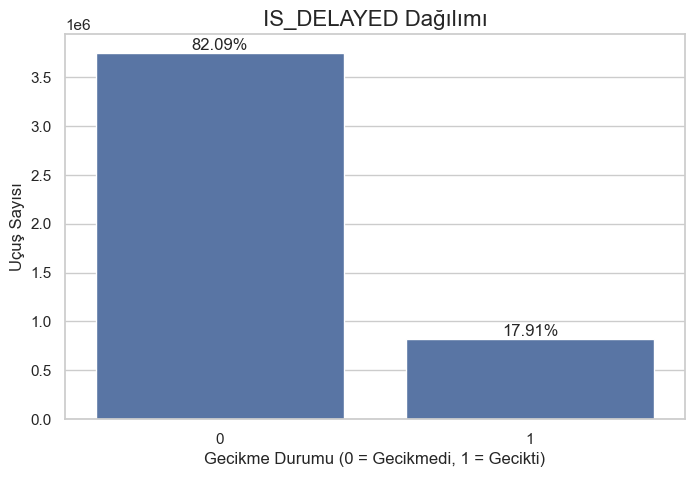


Sayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):


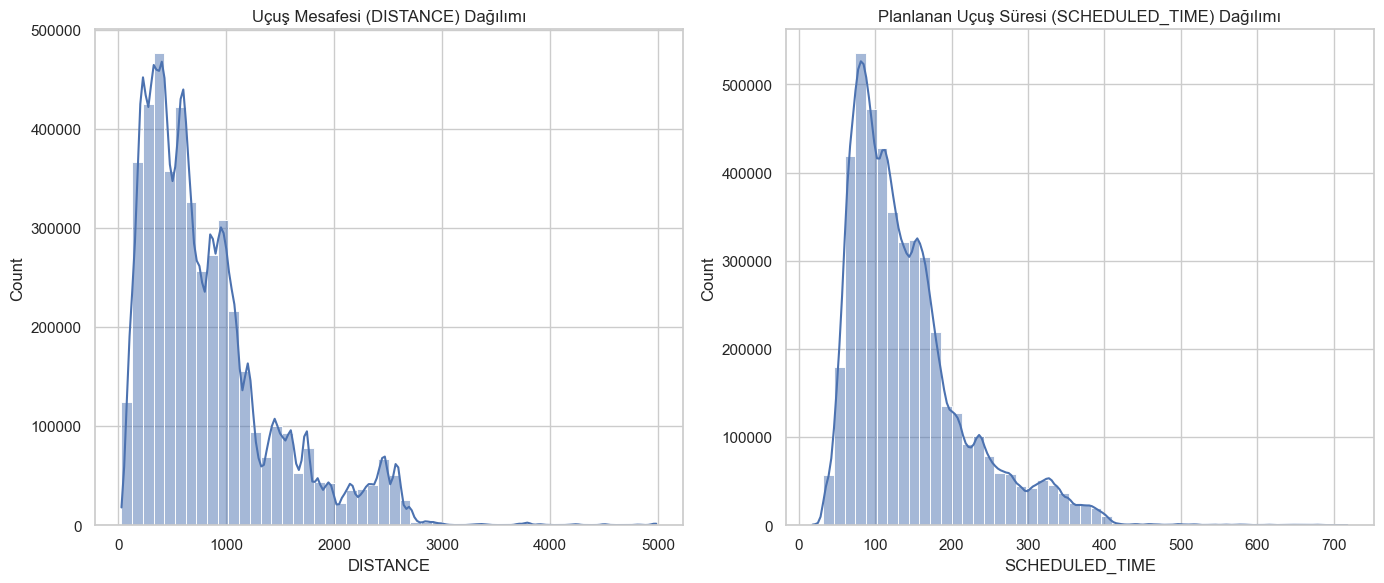


Sayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:


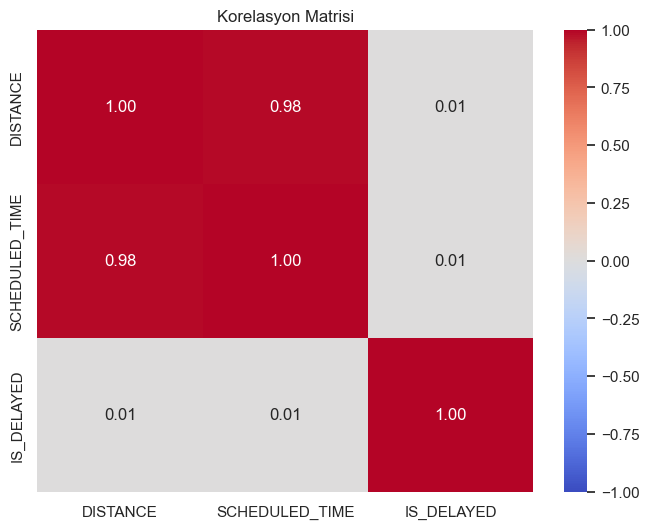

In [26]:
if 'train_df' in locals():

    # 1. EDA - Gecikme Durumu Dağılımı
    plt.figure(figsize=(8, 5))
    sns.countplot(x='IS_DELAYED', data=train_df)
    plt.title('IS_DELAYED Dağılımı', fontsize=16)
    plt.xlabel('Gecikme Durumu (0 = Gecikmedi, 1 = Gecikti)')
    plt.ylabel('Uçuş Sayısı')

    # Yüzde hesaplama ve yazdırma
    total = len(train_df)
    ax = plt.gca()
    for p in ax.patches:
        percentage = f'{(p.get_height() / total * 100):.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    plt.show()


    # 2. Histogramlar
    print(f"\nSayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):")

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df['DISTANCE'], kde=True, bins=50)
    plt.title('Uçuş Mesafesi (DISTANCE) Dağılımı')

    plt.subplot(1, 2, 2)
    sns.histplot(train_df['SCHEDULED_TIME'], kde=True, bins=50)
    plt.title('Planlanan Uçuş Süresi (SCHEDULED_TIME) Dağılımı')
    plt.tight_layout()
    plt.show()


    # 3. Korelasyon Analizi
    print("\nSayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:")

    # --- EKLENEN KISIM BAŞLANGICI ---
    # Hata almamak için numeric_features listesini burada tanımlıyoruz.
    # Histogramda baktığınız değişkenleri buraya ekledim:
    numeric_features = ['DISTANCE', 'SCHEDULED_TIME'] 
    # --- EKLENEN KISIM BİTİŞİ ---

    # Korelasyon matrisi
    # numeric_features listesine hedef değişkeni (IS_DELAYED) ekleyip korelasyona bakıyoruz
    corr_df = train_df[numeric_features + ['IS_DELAYED']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Korelasyon Matrisi')
    plt.show()

else:
    print("Veriler bulunamadı.")

In [27]:
import warnings

# FutureWarning türündeki tüm uyarıları görmezden gel (Gizle)
warnings.simplefilter(action='ignore', category=FutureWarning)

if 'train_df' in locals():
    # x = özellik, y = hedef oluşturma
    
    X_train = train_df.drop('IS_DELAYED', axis=1)
    y_train = train_df['IS_DELAYED']
    
    X_test = test_df.drop('IS_DELAYED', axis=1)
    y_test = test_df['IS_DELAYED']

    # Encoding
    
    X_train_encoded, X_test_encoded = encode_features(X_train, X_test, y_train)
 
    print(f"Eğitime hazır X_train_encoded boyutu: {X_train_encoded.shape}")
    print(f"Teste hazır X_test_encoded boyutu: {X_test_encoded.shape}")
    
else:
    print("Veriler bulunamadı.")

Encoding işlemleri tamamlandı.
Eğitime hazır X_train_encoded boyutu: (4571137, 26)
Teste hazır X_test_encoded boyutu: (1142871, 26)


In [28]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, mean_absolute_error, average_precision_score 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

if 'X_train_encoded' in locals():
   
    print("Model 1 = LogisticRegression (Doğrusal Basit Model)")

    #Model Tanımlama ve Eğitme
    simple_model = LogisticRegression(solver='saga', n_jobs=-1, random_state=42)
    simple_model.fit(X_train_encoded, y_train)
    
    #1. Normal Tahmin Etme (0 ve 1 şeklinde)
    y_pred_simple = simple_model.predict(X_test_encoded)
    
    #Olasılık Tahmin Etme
    y_prob_simple = simple_model.predict_proba(X_test_encoded)[:, 1]

    #Model Skor Hesaplanması
    acc_simple = accuracy_score(y_test, y_pred_simple)
    auc_simple = roc_auc_score(y_test, y_prob_simple)
    mae_simple = mean_absolute_error(y_test, y_pred_simple) 
    pr_auc_simple = average_precision_score(y_test, y_prob_simple)

    print(f"Logistic Regression Doğruluk Oranı: {acc_simple * 100:.2f}%")
    print(f"Logistic Regression MAE: {mae_simple:.2f}")
    print(f"Logistic Regression ROC AUC Skoru: {auc_simple:.2f}")
    print(f"Logistic Regression PR AUC Skoru: {pr_auc_simple:.2f}")
    
    print("Logistic Regression Model Raporu:")
    print(classification_report(y_test, y_pred_simple))

else:
    print("Eğitim verileri bulunamadı")

Model 1 = LogisticRegression (Doğrusal Basit Model)
Logistic Regression Doğruluk Oranı: 82.09%
Logistic Regression MAE: 0.18
Logistic Regression ROC AUC Skoru: 0.60
Logistic Regression PR AUC Skoru: 0.23
Logistic Regression Model Raporu:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    938225
           1       0.00      0.00      0.00    204646

    accuracy                           0.82   1142871
   macro avg       0.41      0.50      0.45   1142871
weighted avg       0.67      0.82      0.74   1142871



In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, mean_absolute_error, average_precision_score

print("Model 2 = Gauss Naive Bayes Modeli")

if 'X_train_encoded' in locals():
    #var_smoothing parametresi ek olarak eklendi
    nb_tuned = GaussianNB(var_smoothing=1e-2)
    
    nb_tuned.fit(X_train_encoded, y_train)
    y_pred_nb_tuned = nb_tuned.predict(X_test_encoded)
    y_prob_nb_tuned = nb_tuned.predict_proba(X_test_encoded)[:, 1]
    
    #Model Skor Hesaplaması
    acc_nb_tuned = accuracy_score(y_test, y_pred_nb_tuned)
    auc_nb_tuned = roc_auc_score(y_test, y_prob_nb_tuned)
    mae_nb_tuned = mean_absolute_error(y_test, y_pred_nb_tuned)
    pr_auc_nb_tuned = average_precision_score(y_test, y_prob_nb_tuned)

    print(f"Naive Bayes Doğruluk Oranı: %{acc_nb_tuned * 100:.2f}")
    print(f"Naive Bayes MAE: {mae_nb_tuned:.2f}")
    print(f"Naive Bayes ROC AUC Skoru: {auc_nb_tuned:.2f}")
    print(f"Naive Bayes PR AUC Skoru: {pr_auc_nb_tuned:.2f}")
    
    print("Naive Bayes Model Raporu:")
    print(classification_report(y_test, y_pred_nb_tuned))
    
else:
    print("HATA: Eğitim verisi bulunamadı.")

Model 2 = Gauss Naive Bayes Modeli
Naive Bayes Doğruluk Oranı: %82.09
Naive Bayes MAE: 0.18
Naive Bayes ROC AUC Skoru: 0.51
Naive Bayes PR AUC Skoru: 0.18
Naive Bayes Model Raporu:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    938225
           1       0.00      0.00      0.00    204646

    accuracy                           0.82   1142871
   macro avg       0.41      0.50      0.45   1142871
weighted avg       0.67      0.82      0.74   1142871



In [30]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, recall_score, precision_score, 
                             roc_auc_score, average_precision_score, mean_absolute_error)
import pandas as pd
import warnings

# Uyarıları gizle
warnings.simplefilter(action='ignore', category=FutureWarning)

if 'X_train_encoded' in locals():
    print("Feature Selection yöntemi olarak Mutual Information seçildi")

    # 1. Ölçekleme işlemi (Scaling)
    # Feature selection ve Lojistik Regresyon için veriyi standartlaştırmak önemlidir.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_test_scaled = scaler.transform(X_test_encoded)

    # 2. Selection işlemi (En iyi 15 sütun)
    print("Özellik seçimi yapılıyor (Mutual Info), bu işlem veri boyutuna göre biraz zaman alabilir...")
    selector = SelectKBest(score_func=mutual_info_classif, k=15)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

    # Seçilen sütunları yazdırma
    cols = X_train_encoded.columns
    selected_mask = selector.get_support()
    selected_names = cols[selected_mask].tolist()

    print(f"\nSeçilen Özellik Sayısı: {len(selected_names)}")
    print("Seçilen Özellikler:")
    for i, name in enumerate(selected_names, 1):
        print(f"{i}. {name}")

    # 3. Modeli Seçilen Sütunlarla Eğitme
    print("\nModel eğitiliyor...")
    sel_model = LogisticRegression(solver='saga', n_jobs=-1, random_state=42)
    sel_model.fit(X_train_selected, y_train)
    
    # 4. Tahminler
    y_pred_sel = sel_model.predict(X_test_selected)
    # AUC metrikleri için olasılık değerleri (1. sınıfın olasılığı)
    y_prob_sel = sel_model.predict_proba(X_test_selected)[:, 1]

    # 5. Metrik Hesaplamaları
    acc_sel = accuracy_score(y_test, y_pred_sel)
    f1_sel = f1_score(y_test, y_pred_sel, average='binary')
    rec_sel = recall_score(y_test, y_pred_sel, average='binary')
    prec_sel = precision_score(y_test, y_pred_sel, average='binary')
    auc_sel = roc_auc_score(y_test, y_prob_sel)
    pr_auc_sel = average_precision_score(y_test, y_prob_sel)
    mae_sel = mean_absolute_error(y_test, y_pred_sel)

    # 6. Sonuçları Yazdırma
    print("-" * 40)
    print(f"Logistic Regression (Feature Selection Sonrası) Performansı:")
    print("-" * 40)
    print(f"Accuracy (Doğruluk) : %{acc_sel * 100:.2f}")
    print(f"F1 Score            : %{f1_sel * 100:.2f}")
    print(f"Recall (Duyarlılık) : %{rec_sel * 100:.2f}")
    print(f"Precision (Kesinlik): %{prec_sel * 100:.2f}")
    print(f"ROC AUC             : %{auc_sel * 100:.2f}")
    print(f"PR AUC              : %{pr_auc_sel * 100:.2f}")
    print(f"MAE (Ortalama Hata) : {mae_sel:.4f}")
    print("-" * 40)

else:
    print("Veri bulunamadı. Lütfen önceki veri yükleme adımlarını çalıştırın.")

Feature Selection yöntemi olarak Mutual Information seçildi
Özellik seçimi yapılıyor (Mutual Info), bu işlem veri boyutuna göre biraz zaman alabilir...

Seçilen Özellik Sayısı: 15
Seçilen Özellikler:
1. AIRLINE_AA
2. AIRLINE_B6
3. AIRLINE_DL
4. AIRLINE_EV
5. AIRLINE_F9
6. AIRLINE_MQ
7. AIRLINE_NK
8. AIRLINE_OO
9. AIRLINE_UA
10. AIRLINE_WN
11. TIME_OF_DAY_Gece (00-05)
12. TIME_OF_DAY_Sabah (06-11)
13. TIME_OF_DAY_Öğle (12-16)
14. TIME_OF_DAY_Akşam (17-20)
15. TIME_OF_DAY_Gece Yarısı (21-23)

Model eğitiliyor...
----------------------------------------
Logistic Regression (Feature Selection Sonrası) Performansı:
----------------------------------------
Accuracy (Doğruluk) : %82.09
F1 Score            : %0.00
Recall (Duyarlılık) : %0.00
Precision (Kesinlik): %0.00
ROC AUC             : %61.53
PR AUC              : %24.39
MAE (Ortalama Hata) : 0.1791
----------------------------------------


In [31]:
#Seçilen selection yöntemini Naive Bayes modeli üzerinde deneme

if 'X_train_selected' in locals():
    nb_sel = GaussianNB()
    nb_sel.fit(X_train_selected, y_train)
    
    y_pred_nb_sel = nb_sel.predict(X_test_selected)
    acc_nb_sel = accuracy_score(y_test, y_pred_nb_sel)

    print(f"Selection işlemi sonrası Naive Bayes model skoru:: %{acc_nb_sel * 100:.2f}")
else:
    print("Veri bulunamadı")

Selection işlemi sonrası Naive Bayes model skoru:: %75.55


In [32]:
print("Boyut indirgeme işlemi için LDA(Linear Discriminant Analysis) yöntemi seçildi")

if 'X_train_scaled' in locals():
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    lda_for_log = LDA(n_components=1)
    
    # Değişken X_train_lda_log olarak tanımlanıyor
    X_train_lda_log = lda_for_log.fit_transform(X_train_scaled, y_train)
    X_test_lda_log = lda_for_log.transform(X_test_scaled)
    
    
    print(f"LDA sonrası özellik sayısı: {X_train_lda_log.shape[1]}")
    
    # LDA yöntemi ile Logistic model eğitimi
    log_lda_model = LogisticRegression(solver='saga', n_jobs=-1, random_state=42)
    log_lda_model.fit(X_train_lda_log, y_train)
    
    y_pred_log_lda = log_lda_model.predict(X_test_lda_log)
    acc_log_lda = accuracy_score(y_test, y_pred_log_lda)
    
    print(f"LDA işlemi sonrası Logistic Regression modelinin doğruluk skoru: %{acc_log_lda * 100:.2f}")
    
else:
    print("Veri bulunamadı")

Boyut indirgeme işlemi için LDA(Linear Discriminant Analysis) yöntemi seçildi
LDA sonrası özellik sayısı: 1
LDA işlemi sonrası Logistic Regression modelinin doğruluk skoru: %82.09


In [33]:

if 'X_train_scaled' in locals():
    lda = LDA(n_components=1)
    
    X_train_lda = lda.fit_transform(X_train_scaled, y_train)
    X_test_lda = lda.transform(X_test_scaled)
    
    print(f"LDA sonrası özellik sayısı: {X_train_lda.shape[1]}")
    
    # LDA yöntemi ile Naive Bayes model eğitimi
    nb_lda = GaussianNB()
    nb_lda.fit(X_train_lda, y_train)
    
    y_pred_nb_lda = nb_lda.predict(X_test_lda)
    acc_nb_lda = accuracy_score(y_test, y_pred_nb_lda)
    
   
    print(f"LDA işlemi sonrası Naive Bayes modelinin doğruluk skoru: %{acc_nb_lda * 100:.2f}")
  
    
else:
    print("Veri bulunamadı")

LDA sonrası özellik sayısı: 1
LDA işlemi sonrası Naive Bayes modelinin doğruluk skoru: %82.09


Modellerin doğruluk skorlarının karşılaştırılması 


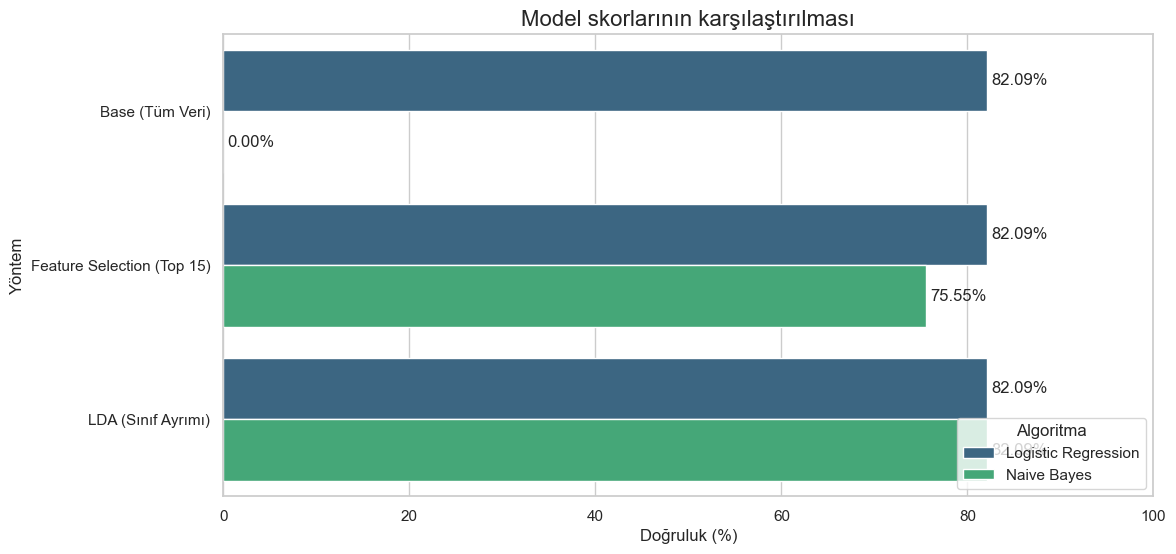


Genel Sonuç Tablosu:
             Algoritma                      Yöntem  Doğruluk (%)
0  Logistic Regression             Base (Tüm Veri)     82.093692
1  Logistic Regression  Feature Selection (Top 15)     82.093692
5          Naive Bayes          LDA (Sınıf Ayrımı)     82.093692
2  Logistic Regression          LDA (Sınıf Ayrımı)     82.091330
4          Naive Bayes  Feature Selection (Top 15)     75.546234
3          Naive Bayes             Base (Tüm Veri)      0.000000


In [34]:
from sklearn.metrics import accuracy_score

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

print("Modellerin doğruluk skorlarının karşılaştırılması ")




#Logistic Regression modelinin skorları
acc_log_base = accuracy_score(y_test, y_pred_simple) if 'y_pred_simple' in locals() else 0

acc_log_sel = accuracy_score(y_test, y_pred_sel) if 'y_pred_sel' in locals() else 0

acc_log_lda = accuracy_score(y_test, y_pred_log_lda) if 'y_pred_log_lda' in locals() else 0



#Naive Bayes Skorları modelinin skorları
acc_nb_base = accuracy_score(y_test, y_pred_nb_base) if 'y_pred_nb_base' in locals() else 0

acc_nb_sel = accuracy_score(y_test, y_pred_nb_sel) if 'y_pred_nb_sel' in locals() else 0

acc_nb_lda = accuracy_score(y_test, y_pred_nb_lda) if 'y_pred_nb_lda' in locals() else 0

results = {

    'Algoritma': [

        'Logistic Regression', 'Logistic Regression', 'Logistic Regression',

        'Naive Bayes', 'Naive Bayes', 'Naive Bayes'

    ],

    'Yöntem': [

        'Base (Tüm Veri)', 'Feature Selection (Top 15)', 'LDA (Sınıf Ayrımı)',

        'Base (Tüm Veri)', 'Feature Selection (Top 15)', 'LDA (Sınıf Ayrımı)'

    ],

    'Doğruluk (%)': [

        acc_log_base * 100, acc_log_sel * 100, acc_log_lda * 100,

        acc_nb_base * 100, acc_nb_sel * 100, acc_nb_lda * 100

    ]

}
# DataFrame oluşturma ve sıralama işlemi
df_results = pd.DataFrame(results).sort_values(by='Doğruluk (%)', ascending=False)

# Görselleştirme işlemi
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Doğruluk (%)', y='Yöntem', hue='Algoritma', data=df_results, palette='viridis')



plt.title('Model skorlarının karşılaştırılması', fontsize=16)
plt.xlim(0, 100)
plt.legend(title='Algoritma', loc='lower right')

for container in ax.containers:

    ax.bar_label(container, fmt='%.2f%%', padding=3)
plt.show()

print("\nGenel Sonuç Tablosu:")
print(df_results)

Modellerin metrik sonuçlarının karşılaştırılması
Model Eğitiliyor: Logistic Regression...
Model Eğitiliyor: Naive Bayes...

Genel Metrik Sonuçlar Tablosu
                     Accuracy  ROC AUC  PR AUC  F1 Score  MAE (Hata)
Model                                                               
Logistic Regression     82.09    59.89   23.42       0.0        0.18
Naive Bayes             82.09    50.77   18.17       0.0        0.18


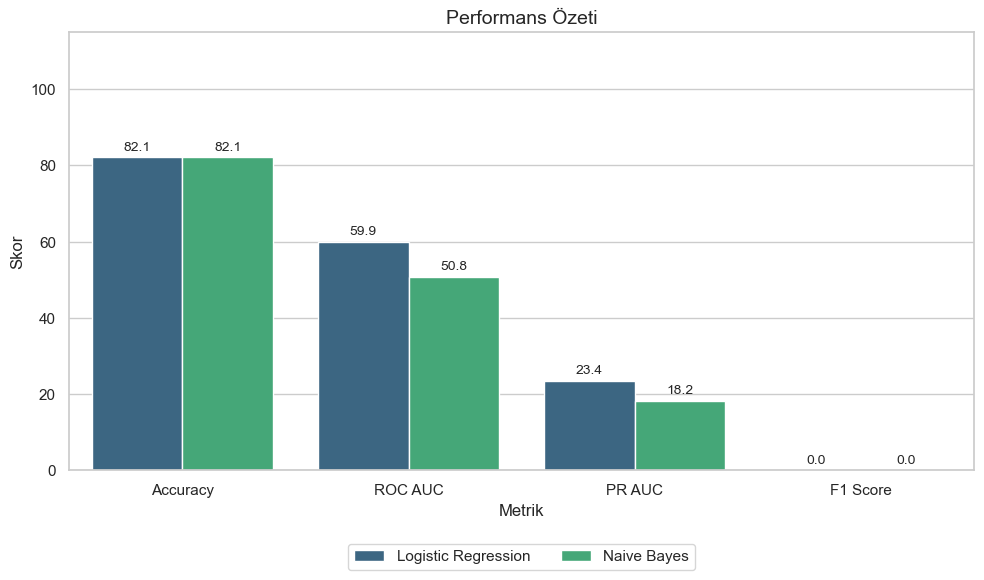

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, 
                             average_precision_score, mean_absolute_error)

sns.set(style="whitegrid")

if 'X_train_encoded' in locals():

    print("Modellerin metrik sonuçlarının karşılaştırılması")
    
    # Modelleri Tanımla
    models = {
        "Logistic Regression": LogisticRegression(solver='saga', max_iter=100, random_state=42),
        "Naive Bayes": GaussianNB(var_smoothing=1e-2)
    }

    results = []

    # Modelleri eğitme ve test etme
    for name, model in models.items():
        print(f"Model Eğitiliyor: {name}...")
        try:
            model.fit(X_train_encoded, y_train)
            y_pred = model.predict(X_test_encoded)
            
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test_encoded)[:, 1]
            else:
                y_prob = y_pred

            # Metrikleri hesaplama işlemi
            acc = accuracy_score(y_test, y_pred) * 100
            f1 = f1_score(y_test, y_pred, average='binary') * 100
            roc_auc = roc_auc_score(y_test, y_prob) * 100
            pr_auc = average_precision_score(y_test, y_prob) * 100 
            mae = mean_absolute_error(y_test, y_pred) 
            
            results.append({
                "Model": name,
                "Accuracy": acc,
                "ROC AUC": roc_auc,
                "PR AUC": pr_auc,
                "F1 Score": f1,
                "MAE (Hata)": mae
            })
            
        except Exception as e:
            print(f"Hata ({name}): {e}")

    # Sonuçları Görselleştirme
    if results:
        df_results = pd.DataFrame(results)
        df_results = df_results.set_index("Model").sort_values(by="PR AUC", ascending=False)
        
        print("\nGenel Metrik Sonuçlar Tablosu")
        print(df_results.round(2))

        plt.figure(figsize=(10, 6)) 

        df_melted = df_results.reset_index().melt(id_vars="Model", var_name="Metrik", value_name="Skor")
        plot_metrics = ["Accuracy", "ROC AUC", "PR AUC", "F1 Score"] 
        df_plot = df_melted[df_melted["Metrik"].isin(plot_metrics)]
        
        # Çizim işlemi
        ax = sns.barplot(x="Metrik", y="Skor", hue="Model", data=df_plot, palette="viridis")
        
        plt.title("Performans Özeti", fontsize=14)
        plt.ylim(0, 115)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
        
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f', padding=3, fontsize=10)

        plt.tight_layout()
        plt.show()

else:
    print("Veri bulunamadı")

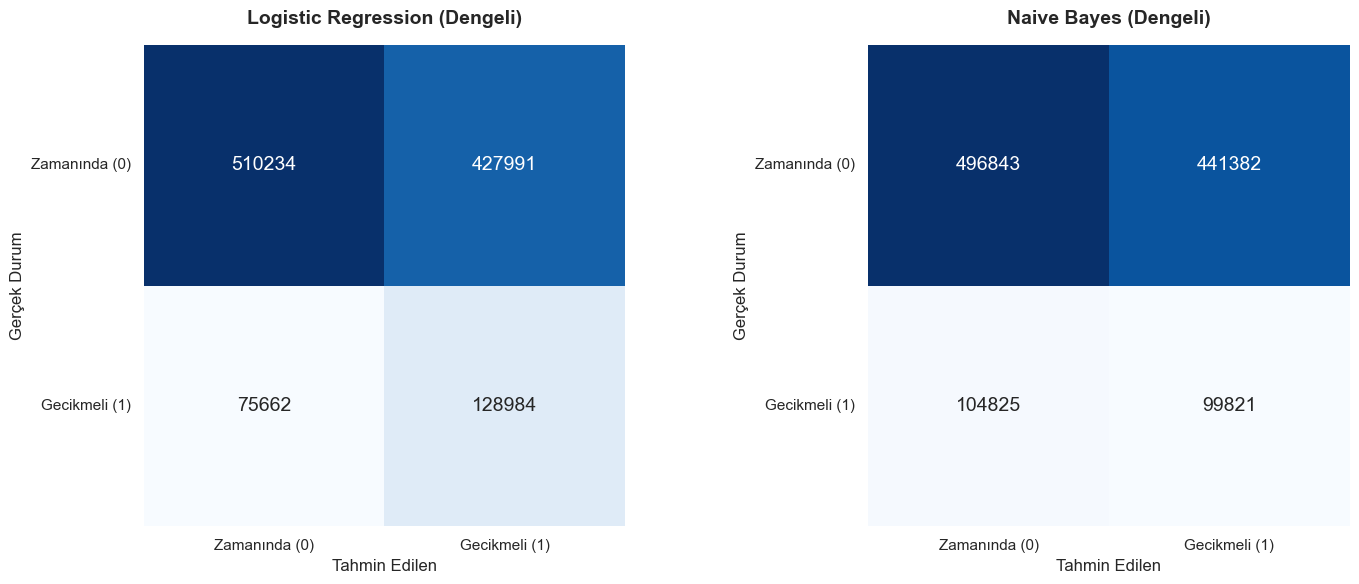

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

sns.set(style="white")

if 'X_train_encoded' in locals():
    models_balanced = {
        "Logistic Regression (Dengeli)": LogisticRegression(
            solver='saga', 
            class_weight='balanced', 
            max_iter=100, 
            random_state=42
        ),
        
        "Naive Bayes (Dengeli)": GaussianNB(
            var_smoothing=1e-2, 
            priors=[0.5, 0.5]
        )
    }

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    for ax, (name, model) in zip(axes, models_balanced.items()):
    
        model.fit(X_train_encoded, y_train)
  
        y_pred = model.predict(X_test_encoded)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                    ax=ax, annot_kws={"size": 14}, square=True)
        ax.set_title(f"{name}", fontsize=14, fontweight='bold', pad=15)
        ax.set_xlabel('Tahmin Edilen', fontsize=12)
        ax.set_ylabel('Gerçek Durum', fontsize=12)
        ax.set_xticklabels(['Zamanında (0)', 'Gecikmeli (1)'], fontsize=11)
        ax.set_yticklabels(['Zamanında (0)', 'Gecikmeli (1)'], fontsize=11, rotation=0)

    plt.tight_layout()
    plt.show()
    
  

else:
    print("Veri bulunamadı.")

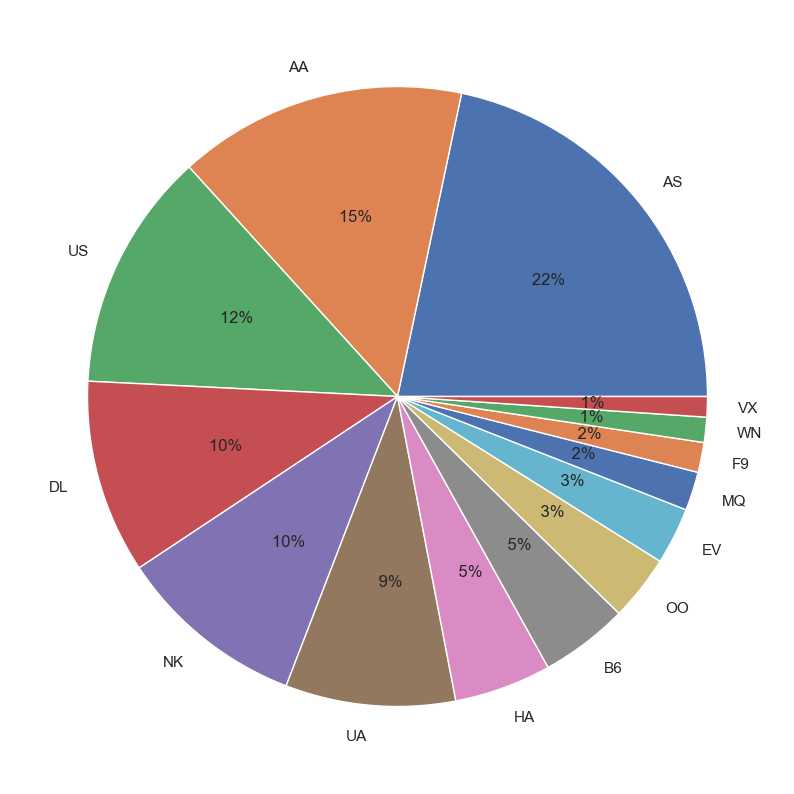

In [37]:
axis = plt.subplots(figsize=(10,14))
Name = df_flights["AIRLINE"].unique()
size = df_flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

en çok uçuşun kalktığı ilk 20 havaalanını ORIGIN_AIRPORT


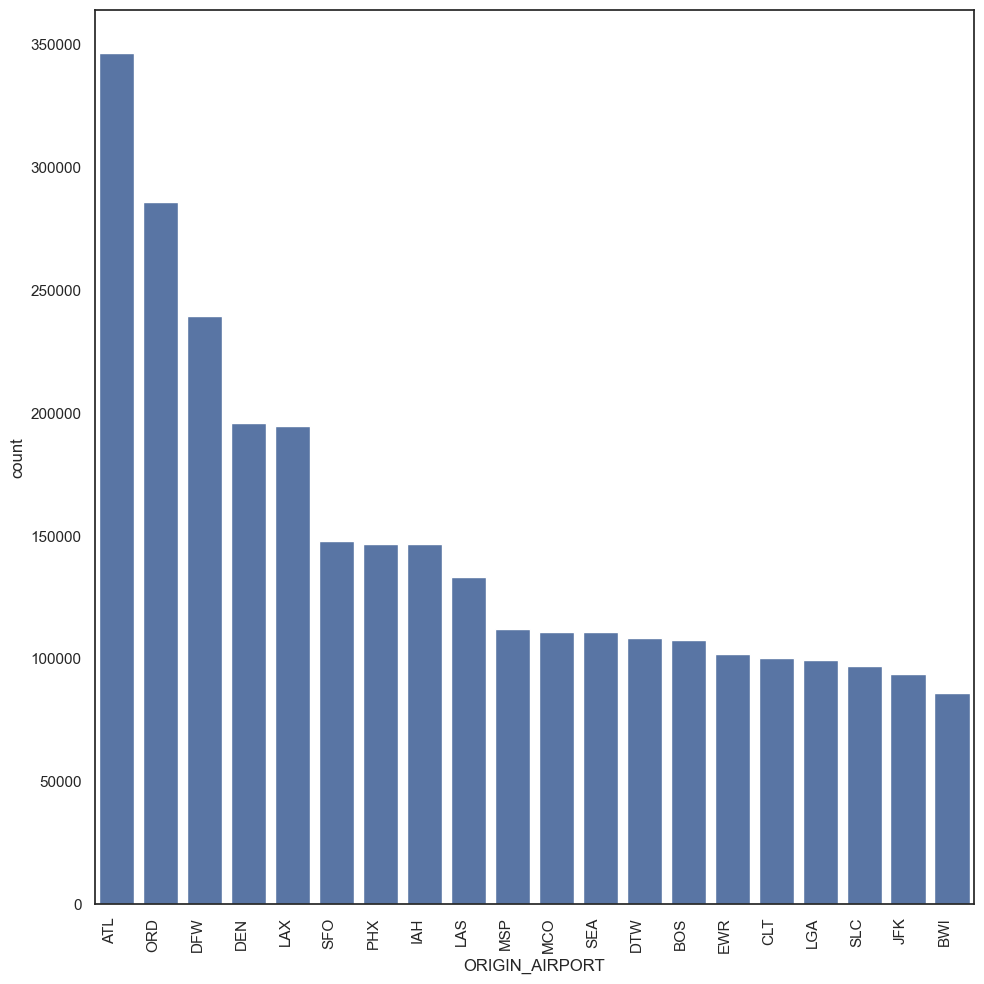

In [38]:
import warnings

# Uyarıları gizle
warnings.simplefilter(action='ignore', category=FutureWarning)

print("en çok uçuşun kalktığı ilk 20 havaalanını ORIGIN_AIRPORT")
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=df_flights['ORIGIN_AIRPORT'], data = df_flights,
              order=df_flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

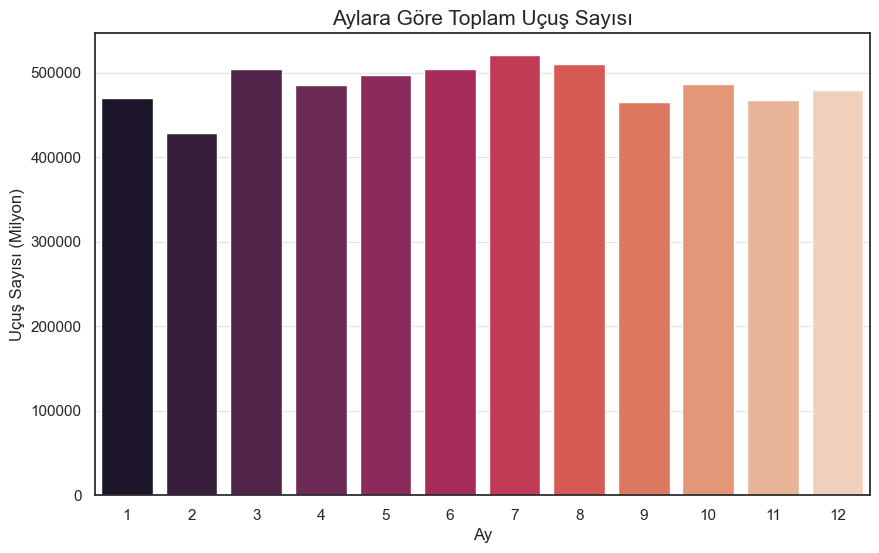

In [39]:
import warnings

# Uyarıları gizle
warnings.simplefilter(action='ignore', category=FutureWarning)

# Her ay için uçuş sayısını hesaplama
monthly_flights = df_flights['MONTH'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_flights.index, y=monthly_flights.values, palette="rocket")
plt.title('Aylara Göre Toplam Uçuş Sayısı', fontsize=15)
plt.xlabel('Ay', fontsize=12)
plt.ylabel('Uçuş Sayısı (Milyon)', fontsize=12)
plt.xticks(ticks=range(12))
plt.grid(axis='y', alpha=0.5)
plt.show()

In [40]:
# Her havayolu için ortalama uçuş mesafesi
airline_distance = df_flights.groupby('AIRLINE')['DISTANCE'].mean().sort_values(ascending=False)

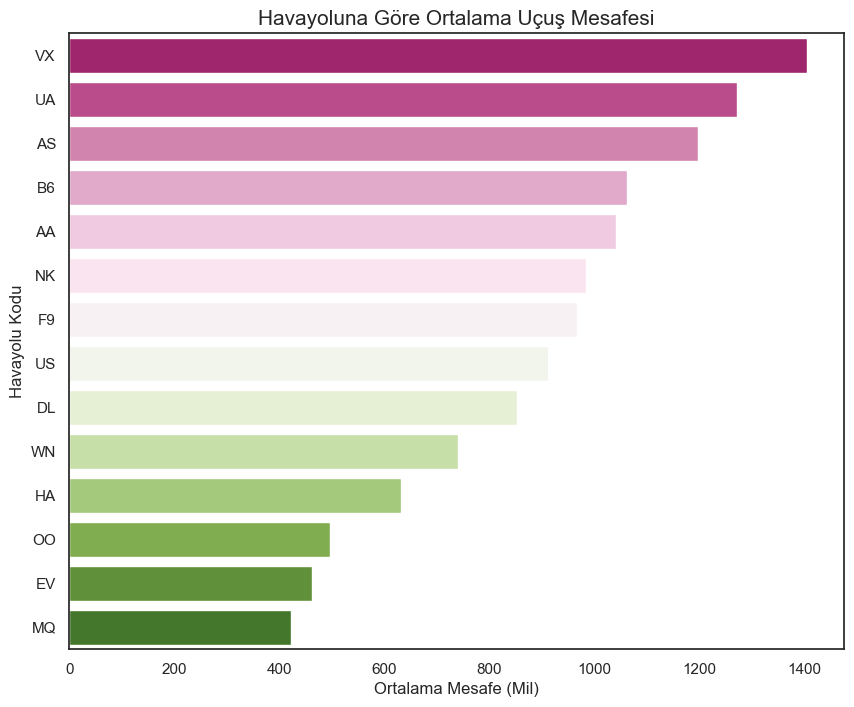

In [41]:
import warnings

# Uyarıları gizle
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10, 8))
sns.barplot(y=airline_distance.index, x=airline_distance.values, palette="PiYG")
plt.title('Havayoluna Göre Ortalama Uçuş Mesafesi', fontsize=15)
plt.xlabel('Ortalama Mesafe (Mil)', fontsize=12)
plt.ylabel('Havayolu Kodu', fontsize=12)
plt.show()

FİNAL KISMI

In [28]:
# Veri setini 100.000 satıra düşürme (Model performansı ve hız için)
if 'df_flights' in locals() and df_flights is not None:
    if len(df_flights) > 100000:
        df_flights = df_flights.sample(n=100000, random_state=42)
        print(f"Veri seti 100.000 satıra düşürüldü. Yeni boyut: {df_flights.shape}")
    else:
        print(f"Veri seti zaten 100.000 satırın altında. Boyut: {df_flights.shape}")

Veri seti 100.000 satıra düşürüldü. Yeni boyut: (100000, 31)


In [29]:
import gc
import pandas as pd


if 'df_flights_original' in locals():
    del df_flights_original
    
# 2. Veri tiplerini optimize ederek RAM kullanımını düşürme
def optimize_memory(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

# Örneklenmiş veri setini optimize etme
if 'df_flights' in locals():
    df_flights = optimize_memory(df_flights)

# Çöp toplayıcıyı çalıştırma
gc.collect()
print("Bellek temizlendi ve veri tipleri optimize edildi.")

Bellek temizlendi ve veri tipleri optimize edildi.


In [30]:
from sklearn.preprocessing import LabelEncoder
import gc

# Kategorik sütunları belirleme
categorical_cols = df_flights.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df_flights[col] = le.fit_transform(df_flights[col].astype(str))

# RAM temizliği
gc.collect()
print("Kategorik sütunlar başarıyla dönüştürüldü.")

Kategorik sütunlar başarıyla dönüştürüldü.


In [53]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, average_precision_score,
    classification_report # Sınıf bazlı rapor için eklendi
)

print("Extra Trees modeli eğitiliyor...")

# Model tanımlama
et_model = ExtraTreesClassifier(
    n_estimators=50, 
    max_depth=12,      
    random_state=42, 
    n_jobs=-1
)

et_model.fit(X_train_encoded, y_train)

# Tahminler
y_pred_et = et_model.predict(X_test_encoded)
y_prob_et = et_model.predict_proba(X_test_encoded)[:, 1]

# --- SONUÇLAR ---
print("-" * 45)
print("GENEL MODEL SONUÇLARI:")
print("-" * 45)
print(f"Accuracy  : %{accuracy_score(y_test, y_pred_et)*100:.2f}")
print(f"Precision : %{precision_score(y_test, y_pred_et)*100:.2f}")
print(f"Recall    : %{recall_score(y_test, y_pred_et)*100:.2f}")
print(f"F1 Score  : %{f1_score(y_test, y_pred_et)*100:.2f}")
print(f"ROC AUC   : %{roc_auc_score(y_test, y_prob_et)*100:.2f}")
print(f"PR AUC    : %{average_precision_score(y_test, y_prob_et)*100:.2f}")

print("-" * 45)
print("SINIF BAZLI (0 ve 1) DETAYLI ANALİZ:")
print("-" * 45)
# Bu kısım 0 ve 1 sınıfları için precision, recall ve f1-score'u ayrı ayrı basar
print(classification_report(y_test, y_pred_et, target_names=['Sınıf 0', 'Sınıf 1']))
print("-" * 45)

Extra Trees modeli eğitiliyor...
---------------------------------------------
GENEL MODEL SONUÇLARI:
---------------------------------------------
Accuracy  : %82.09
Precision : %80.00
Recall    : %0.00
F1 Score  : %0.00
ROC AUC   : %65.71
PR AUC    : %29.32
---------------------------------------------
SINIF BAZLI (0 ve 1) DETAYLI ANALİZ:
---------------------------------------------
              precision    recall  f1-score   support

     Sınıf 0       0.82      1.00      0.90    938225
     Sınıf 1       0.80      0.00      0.00    204646

    accuracy                           0.82   1142871
   macro avg       0.81      0.50      0.45   1142871
weighted avg       0.82      0.82      0.74   1142871

---------------------------------------------


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Mevcut et_model'den özellik önem derecelerini alalım
importances = et_model.feature_importances_
feature_names = X_train_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 2. Önem derecesi ortalamanın üzerinde olanları veya belirli bir eşiği geçenleri seçelim
# Burada basitlik olması için önem derecesi 0.01'den büyük olanları seçiyoruz
selector_threshold = 0.01
selected_features = feature_importance_df[feature_importance_df['Importance'] > selector_threshold]['Feature'].tolist()

print(f"Toplam Özellik Sayısı: {len(feature_names)}")
print(f"Seçilen Önemli Özellik Sayısı: {len(selected_features)}")
print("\nEn Önemli İlk 10 Özellik:")
print(feature_importance_df.head(10))

# Veriyi filtrele
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

Toplam Özellik Sayısı: 26
Seçilen Önemli Özellik Sayısı: 18

En Önemli İlk 10 Özellik:
                        Feature  Importance
22    TIME_OF_DAY_Sabah (06-11)    0.239227
24    TIME_OF_DAY_Akşam (17-20)    0.147192
0                         MONTH    0.100716
10                   AIRLINE_DL    0.066535
6   DESTINATION_AIRPORT_ENCODED    0.056691
5        ORIGIN_AIRPORT_ENCODED    0.056075
21     TIME_OF_DAY_Gece (00-05)    0.045655
23     TIME_OF_DAY_Öğle (12-16)    0.044795
15                   AIRLINE_NK    0.036074
1                           DAY    0.034315


In [38]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, average_precision_score
)

# Yeni modeli tanımlama
et_model_selected = ExtraTreesClassifier(
    n_estimators=50, 
    max_depth=12, 
    random_state=42, 
    n_jobs=-1
)

# Yeni modeli eğitme
print("Seçilmiş özelliklerle model eğitiliyor...")
et_model_selected.fit(X_train_selected, y_train)

# Tahminler
y_pred_sel = et_model_selected.predict(X_test_selected)
y_prob_sel = et_model_selected.predict_proba(X_test_selected)[:, 1]

# Metriklerin hesaplanması
acc_sel = accuracy_score(y_test, y_pred_sel)
prec_sel = precision_score(y_test, y_pred_sel)
rec_sel = recall_score(y_test, y_pred_sel)
f1_sel = f1_score(y_test, y_pred_sel)
auc_sel = roc_auc_score(y_test, y_prob_sel)
pr_auc_sel = average_precision_score(y_test, y_prob_sel)

# Sonuçları yazdırma
print("-" * 45)
print("Seçilmiş Özelliklerle Extra Trees Sonuçları:")
print("-" * 45)
print(f"Accuracy (Doğruluk)     : %{acc_sel * 100:.2f}")
print(f"Precision (Kesinlik)    : %{prec_sel * 100:.2f}")
print(f"Recall (Duyarlılık)     : %{rec_sel * 100:.2f}")
print(f"F1 Score               : %{f1_sel * 100:.2f}")
print(f"ROC AUC                : %{auc_sel * 100:.2f}")
print(f"PR AUC (Avg Precision) : %{pr_auc_sel * 100:.2f}")
print("-" * 45)

Seçilmiş özelliklerle model eğitiliyor...
---------------------------------------------
Seçilmiş Özelliklerle Extra Trees Sonuçları:
---------------------------------------------
Accuracy (Doğruluk)     : %82.09
Precision (Kesinlik)    : %75.00
Recall (Duyarlılık)     : %0.00
F1 Score               : %0.00
ROC AUC                : %65.81
PR AUC (Avg Precision) : %29.76
---------------------------------------------


In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import gc

print("LDA işlemi başlatılıyor...")

# 1. Veriyi Standartlaştırma (LDA için zorunludur)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# 2. LDA Uygulama (n_components = sınıf_sayısı - 1)
lda = LDA(n_components=1) 
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print(f"LDA sonrası yeni veri boyutu: {X_train_lda.shape}")
gc.collect()

LDA işlemi başlatılıyor...
LDA sonrası yeni veri boyutu: (4571137, 1)


1351

In [40]:
# LDA verisi ile Extra Trees modelini tanımlama
et_model_lda = ExtraTreesClassifier(
    n_estimators=50, 
    max_depth=12, 
    random_state=42, 
    n_jobs=-1
)

# Modeli eğitme
print("LDA verisi ile model eğitiliyor...")
et_model_lda.fit(X_train_lda, y_train)

# Tahminler
y_pred_lda = et_model_lda.predict(X_test_lda)
y_prob_lda = et_model_lda.predict_proba(X_test_lda)[:, 1]

# Metriklerin hesaplanması
acc_lda = accuracy_score(y_test, y_pred_lda)
prec_lda = precision_score(y_test, y_pred_lda)
rec_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)
auc_lda = roc_auc_score(y_test, y_prob_lda)
pr_auc_lda = average_precision_score(y_test, y_prob_lda)

# Sonuçları yazdırma
print("-" * 45)
print("LDA + Extra Trees Sonuçları:")
print("-" * 45)
print(f"Accuracy (Doğruluk)     : %{acc_lda * 100:.2f}")
print(f"Precision (Kesinlik)    : %{prec_lda * 100:.2f}")
print(f"Recall (Duyarlılık)     : %{rec_lda * 100:.2f}")
print(f"F1 Score               : %{f1_lda * 100:.2f}")
print(f"ROC AUC                : %{auc_lda * 100:.2f}")
print(f"PR AUC (Avg Precision) : %{pr_auc_lda * 100:.2f}")
print("-" * 45)

LDA verisi ile model eğitiliyor...
---------------------------------------------
LDA + Extra Trees Sonuçları:
---------------------------------------------
Accuracy (Doğruluk)     : %82.09
Precision (Kesinlik)    : %33.33
Recall (Duyarlılık)     : %0.00
F1 Score               : %0.01
ROC AUC                : %63.54
PR AUC (Avg Precision) : %26.09
---------------------------------------------


In [44]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# 1. Standart Extra Trees (Tüm Özellikler)
et_standard = ExtraTreesClassifier(n_estimators=50, max_depth=12, random_state=42, n_jobs=-1)
et_standard.fit(X_train_encoded, y_train)

y_pred_et = et_standard.predict(X_test_encoded)
y_prob_et = et_standard.predict_proba(X_test_encoded)[:, 1]

# Değişkenleri tanımlıyoruz
acc_et = accuracy_score(y_test, y_pred_et)
prec_et = precision_score(y_test, y_pred_et)
rec_et = recall_score(y_test, y_pred_et)
f1_et = f1_score(y_test, y_pred_et)
auc_et = roc_auc_score(y_test, y_prob_et)
pr_auc_et = average_precision_score(y_test, y_prob_et)

print("Standart Model (Tüm Özellikler) eğitildi ve metrikler kaydedildi.")

Standart Model (Tüm Özellikler) eğitildi ve metrikler kaydedildi.


Farklı Yöntemlerin Performans Karşılaştırması:


,Metrik,Tüm Özellikler,Özellik Seçimi,LDA
0,Accuracy,0.820940,0.820939,0.820930
1,Precision,0.800000,0.750000,0.333333
2,Recall,0.000020,0.000015,0.000039
3,F1 Score,0.000039,0.000029,0.000078
4,ROC AUC,0.657144,0.658058,0.635436
5,PR AUC,0.293239,0.297612,0.260910


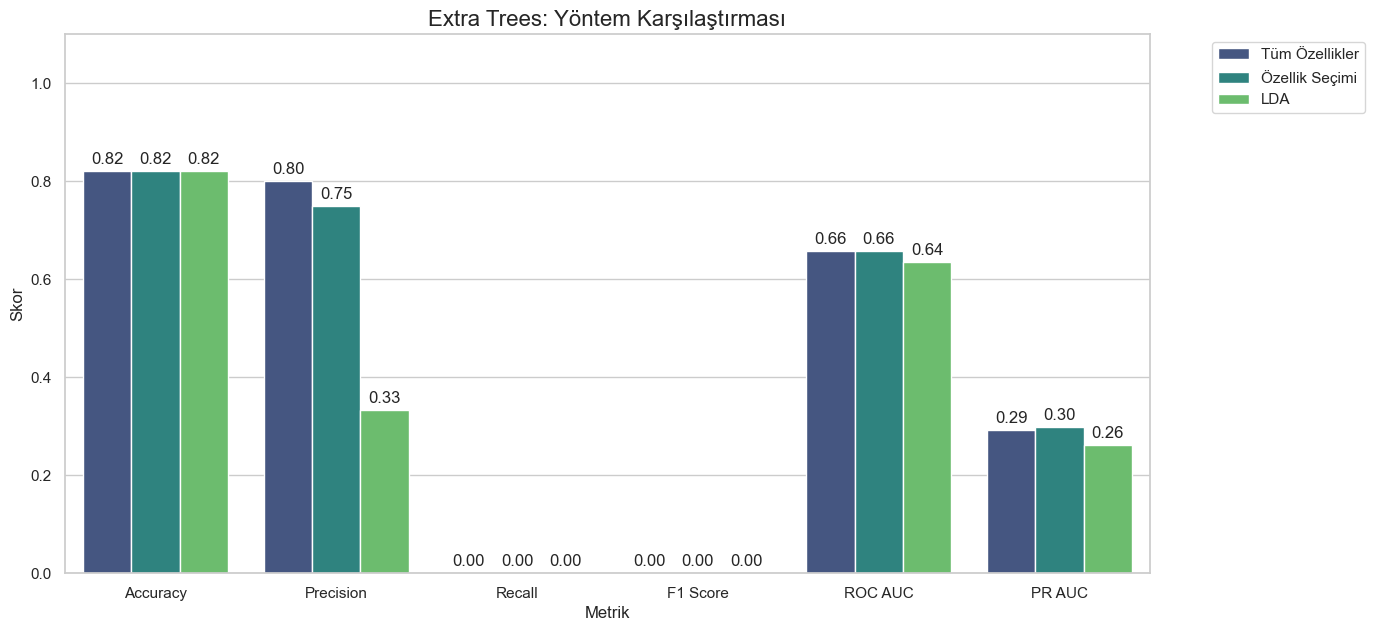

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Değişkenlerin tanımlı olup olmadığını kontrol ederek tabloyu oluşturuyoruz
try:
    comparison_results = pd.DataFrame({
        'Metrik': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC'],
        'Tüm Özellikler': [acc_et, prec_et, rec_et, f1_et, auc_et, pr_auc_et],
        'Özellik Seçimi': [acc_sel, prec_sel, rec_sel, f1_sel, auc_sel, pr_auc_sel],
        'LDA': [acc_lda, prec_lda, rec_lda, f1_lda, auc_lda, pr_auc_lda]
    })

    print("Farklı Yöntemlerin Performans Karşılaştırması:")
    display(comparison_results)

    # Görselleştirme
    plt.figure(figsize=(14, 7))
    df_plot = comparison_results.melt(id_vars='Metrik', var_name='Yöntem', value_name='Skor')
    ax = sns.barplot(x='Metrik', y='Skor', hue='Yöntem', data=df_plot, palette='viridis')
    plt.title('Extra Trees: Yöntem Karşılaştırması', fontsize=16)
    plt.ylim(0, 1.1)
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

except NameError as e:
    print(f"HATA: Bazı model sonuçları eksik! Lütfen tüm model eğitim hücrelerini sırayla çalıştırın.\nEksik değişken: {e}")

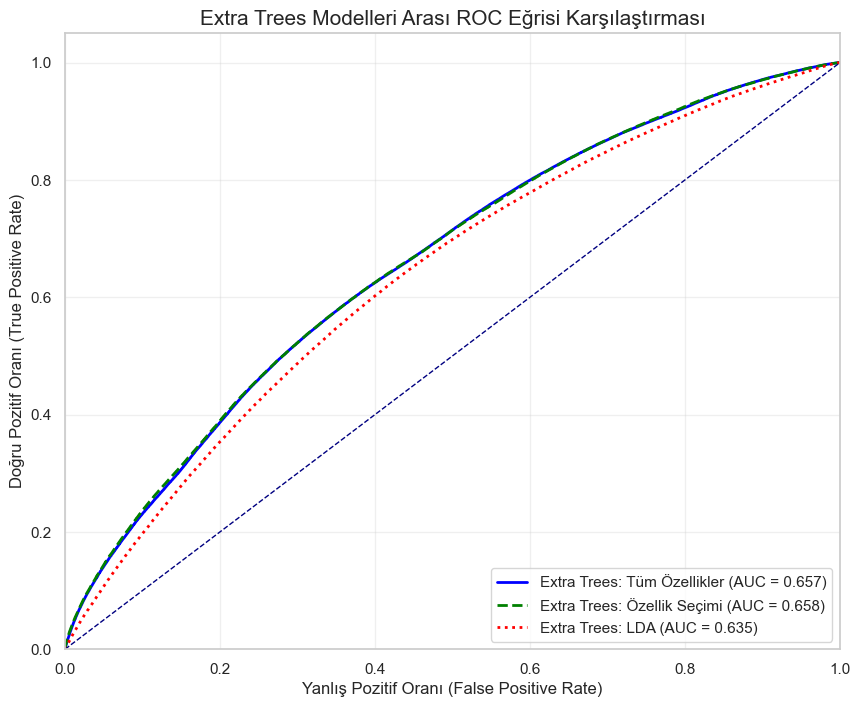

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Her bir yöntem için ROC değerlerini hesaplayalım

# Tüm Özellikler (Standart Model)
fpr_et, tpr_et, _ = roc_curve(y_test, y_prob_et)
roc_auc_et_val = auc(fpr_et, tpr_et)

# Özellik Seçimi (Selected Features)
fpr_sel, tpr_sel, _ = roc_curve(y_test, y_prob_sel)
roc_auc_sel_val = auc(fpr_sel, tpr_sel)

# LDA (Dimensionality Reduction)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
roc_auc_lda_val = auc(fpr_lda, tpr_lda)

# 2. Görselleştirme
plt.figure(figsize=(10, 8))

# Her bir eğriyi çizelim
plt.plot(fpr_et, tpr_et, color='blue', lw=2, 
         label=f'Extra Trees: Tüm Özellikler (AUC = {roc_auc_et_val:.3f})')

plt.plot(fpr_sel, tpr_sel, color='green', lw=2, linestyle='--',
         label=f'Extra Trees: Özellik Seçimi (AUC = {roc_auc_sel_val:.3f})')

plt.plot(fpr_lda, tpr_lda, color='red', lw=2, linestyle=':',
         label=f'Extra Trees: LDA (AUC = {roc_auc_lda_val:.3f})')

# Şans Çizgisi (Random Classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

# Grafik Ayarları
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (False Positive Rate)', fontsize=12)
plt.ylabel('Doğru Pozitif Oranı (True Positive Rate)', fontsize=12)
plt.title('Extra Trees Modelleri Arası ROC Eğrisi Karşılaştırması', fontsize=15)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.show()

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np

print("PyTorch için veri hazırlığı yapılıyor...")

# 1. Veriyi Standartlaştırma (ANN modelleri için kritik öneme sahiptir)
scaler_pt = StandardScaler()
X_train_pt = scaler_pt.fit_transform(X_train_encoded)
X_test_pt = scaler_pt.transform(X_test_encoded)

# 2. Tensorlara Dönüştürme
X_train_tensor = torch.FloatTensor(X_train_pt)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_pt)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

# 3. DataLoader Oluşturma (Batch size: 64)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

print("Hazırlık tamamlandı.")

PyTorch için veri hazırlığı yapılıyor...
Hazırlık tamamlandı.


In [47]:
class DelayANN(nn.Module):
    def __init__(self, input_size):
        super(DelayANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Model nesnesi, kayıp fonksiyonu ve optimizer
input_dim = X_train_encoded.shape[1]
pt_model = DelayANN(input_dim)
criterion = nn.BCELoss() # Binary Cross Entropy
optimizer = optim.Adam(pt_model.parameters(), lr=0.001)

print("PyTorch ANN Modeli Oluşturuldu.")

PyTorch ANN Modeli Oluşturuldu.


In [48]:
epochs = 20
pt_model.train()

print("Eğitim başladı...")
for epoch in range(epochs):
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = pt_model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

print("Eğitim tamamlandı.")

Eğitim başladı...
Epoch [5/20], Loss: 0.4414
Epoch [10/20], Loss: 0.4402
Epoch [15/20], Loss: 0.4393
Epoch [20/20], Loss: 0.4388
Eğitim tamamlandı.


In [49]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, average_precision_score
)

pt_model.eval()
with torch.no_grad():
    y_prob_pt = pt_model(X_test_tensor).numpy()
    y_pred_pt = (y_prob_pt > 0.5).astype(int)

# Metriklerin hesaplanması
acc_pt = accuracy_score(y_test, y_pred_pt)
prec_pt = precision_score(y_test, y_pred_pt)
rec_pt = recall_score(y_test, y_pred_pt)
f1_pt = f1_score(y_test, y_pred_pt)
auc_pt = roc_auc_score(y_test, y_prob_pt)
pr_auc_pt = average_precision_score(y_test, y_prob_pt)

print("-" * 45)
print("PyTorch (ANN) Model Sonuçları:")
print("-" * 45)
print(f"Accuracy  : %{acc_pt * 100:.2f}")
print(f"Precision : %{prec_pt * 100:.2f}")
print(f"Recall    : %{rec_pt * 100:.2f}")
print(f"F1 Score  : %{f1_pt * 100:.2f}")
print(f"ROC AUC   : %{auc_pt * 100:.2f}")
print(f"PR AUC    : %{pr_auc_pt * 100:.2f}")
print("-" * 45)

---------------------------------------------
PyTorch (ANN) Model Sonuçları:
---------------------------------------------
Accuracy  : %82.25
Precision : %60.46
Recall    : %2.50
F1 Score  : %4.81
ROC AUC   : %68.72
PR AUC    : %33.59
---------------------------------------------


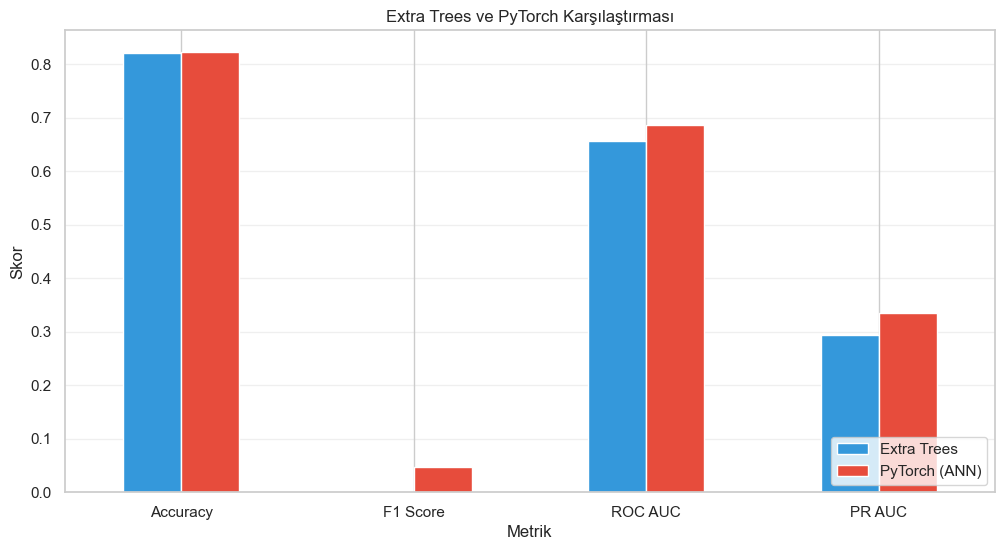

In [50]:
# Karşılaştırma verisi
final_comp = pd.DataFrame({
    'Metrik': ['Accuracy', 'F1 Score', 'ROC AUC', 'PR AUC'],
    'Extra Trees': [acc_et if 'acc_et' in locals() else 0, 
                    f1_et if 'f1_et' in locals() else 0, 
                    auc_et if 'auc_et' in locals() else 0, 
                    pr_auc_et if 'pr_auc_et' in locals() else 0],
    'PyTorch (ANN)': [acc_pt, f1_pt, auc_pt, pr_auc_pt]
})

# Çizim
final_comp.set_index('Metrik').plot(kind='bar', figsize=(12, 6), color=['#3498db', '#e74c3c'])
plt.title('Extra Trees ve PyTorch Karşılaştırması')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.show()